In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [98]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
df = pd.read_csv("BBC_News.csv")

In [100]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [101]:
df.drop(columns=["ArticleId"] , inplace =True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1490 non-null   object
 1   Category  1490 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [103]:
df.isnull().sum()

Text        0
Category    0
dtype: int64

In [104]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

50


### Histogram of News Category Column

Text(0, 0.5, 'count')

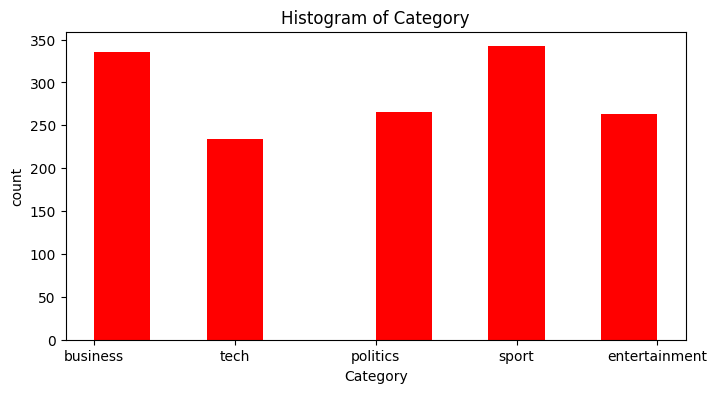

In [105]:
plt.figure(figsize=(8,4) )
plt.hist(df["Category"]  , color="red")
plt.title("Histogram of Category")
plt.xlabel("Category")
plt.ylabel("count")

In [106]:
values=df["Category"].value_counts().values

(-1.0999994606413506, 1.0999950800166, -1.099999687796657, 1.099998709249845)

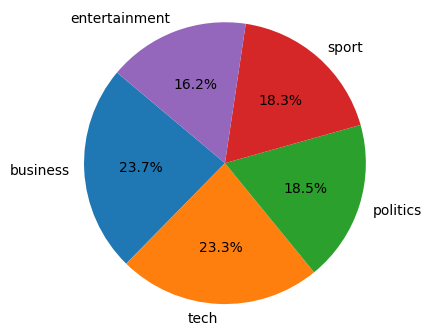

In [107]:
plt.figure(figsize=(4, 4))  # Optional: Set the figure size
plt.pie(values, labels=df["Category"].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')

## Cleaning of Text Data

In [108]:
def cleaning(text):
    text = re.sub(r'' , "" , text)
    text = re.sub(r'[^a-zA-Z0-9\s]' , "" , text)
    text = text.lower()
    return text
df["Text"] = df["Text"].apply(cleaning)

In [109]:
df.sample(5)

,Text,Category
495,new browser wins over net surfers the proporti...,tech
546,kuznetsova failed a drugs test us open champ...,sport
732,scotland 1810 italy six chris paterson penalti...,sport
239,tulu to appear at caledonian run twotime olymp...,sport
1036,tautou to star in da vinci film french actre...,entertainment


## Remove stopwords , Apply lemmatization

In [110]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [111]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [112]:
new_sent =[]
corpus_for_word2vec = []
for sent in df["Text"]:
   sent_arr = word_tokenize(sent)
   sent_arr =[lemmatizer.lemmatize(word) for word in sent_arr if word not in stopwords]
   sent = " ".join(sent_arr)
   corpus_for_word2vec.append(sent_arr)
   new_sent.append(sent)

df["Text"] = new_sent

In [113]:
df.head()

,Text,Category
0,worldcom exboss launch defence lawyer defendin...,business
1,german business confidence slide german busine...,business
2,bbc poll indicates economic gloom citizen majo...,business
3,lifestyle governs mobile choice faster better ...,tech
4,enron boss 168m payout eighteen former enron d...,business


## Split Data into Train and Test set

In [114]:
from sklearn.model_selection import train_test_split , GridSearchCV
x_train , x_test , y_train ,y_test = train_test_split(df[["Text"]] , df["Category"]  , test_size =0.2 , random_state =42)

## Encode categorical feature into numerical feature using LabelEncoder

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Convert Text to Vector usinf Bag of Words

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
bog = CountVectorizer()
bog.fit(x_train['Text'])
x_train_new= pd.DataFrame(bog.transform(x_train['Text']).toarray())
x_test_new = pd.DataFrame(bog.transform(x_test['Text']).toarray())

In [117]:
x_train_new.head()

,0,1,2,3,4,5,6,7,8,9,...,22042,22043,22044,22045,22046,22047,22048,22049,22050,22051
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apply ML Algo
### 1. RandomForest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_new , y_train)
y_pred = rfc.predict(x_test_new)

In [176]:
from sklearn.metrics import accuracy_score
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.9513888888888888


### 2. Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_new , y_train)
y_pred = lr.predict(x_test_new)

In [121]:
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.9618055555555556


# Phase 2 : Convert Text to Vector usinf TFIDF



In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(x_train["Text"])
x_train_tf=pd.DataFrame(tfidf.transform(x_train["Text"]).toarray())
x_test_tf=pd.DataFrame(tfidf.transform(x_test['Text']).toarray())

In [123]:
x_train_tf.head()

,0,1,2,3,4,5,6,7,8,9,...,22042,22043,22044,22045,22046,22047,22048,22049,22050,22051
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.028908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Apply Ml Algo
### 1. RandomForest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_tf , y_train)
y_pred = rfc.predict(x_test_tf)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.9479166666666666


### 2. Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_tf , y_train)
y_pred = lr.predict(x_test_tf)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.9652777777777778


In [126]:
pred = lr.predict(x_test_tf.loc[0:0])
print(f"Prediction: {pred}\nOriginal y_test: {y_test[0]}")

Prediction: [3]
Original y_test: 3


#  Convert Text to Vector using Word2vec 

In [127]:
from gensim.models import Word2Vec
model = Word2Vec(corpus_for_word2vec ,window=10,min_count=2 , vector_size=10 )

In [128]:
model.wv.index_to_key

['said',
 'mr',
 'year',
 'would',
 'also',
 'new',
 'people',
 'u',
 'one',
 'could',
 'game',
 'time',
 'first',
 'last',
 'say',
 'two',
 'world',
 'government',
 'film',
 'uk',
 'company',
 'make',
 'firm',
 'get',
 'number',
 'best',
 'told',
 'service',
 'country',
 'made',
 'many',
 'market',
 'month',
 'take',
 'like',
 'three',
 '000',
 'back',
 'week',
 'player',
 'way',
 'set',
 'next',
 'labour',
 'win',
 'show',
 'sale',
 'party',
 'election',
 'music',
 'bbc',
 'minister',
 'good',
 'well',
 'may',
 'plan',
 'want',
 'home',
 'added',
 'work',
 'day',
 'go',
 '2004',
 'england',
 'group',
 'million',
 'play',
 'still',
 'phone',
 'right',
 'second',
 'mobile',
 'blair',
 'tax',
 'come',
 'since',
 'going',
 'use',
 'see',
 'part',
 'top',
 'award',
 'think',
 'technology',
 'much',
 'report',
 'european',
 'used',
 'british',
 'end',
 'need',
 'record',
 'public',
 'put',
 'even',
 'deal',
 'director',
 'share',
 'business',
 'however',
 'news',
 'expected',
 '10',
 'econ

In [129]:
model.wv[0]

array([ 0.7896792 , -0.26858103, -0.22005197,  0.34029484,  0.58366305,
        0.25921518,  0.70364434,  2.332753  , -5.958213  , -1.0142888 ],
      dtype=float32)

In [130]:
def apply_avg2wordvec(sent):
    sent = [word for word in sent if word in model.wv.index_to_key]
    if not sent:  # Check if sent is empty after filtering
        return np.zeros(model.vector_size)  # Return zero vector if sent is empty
    else:
        return np.mean(model.wv[sent], axis=0)

In [131]:
vector_corpus =[]
for s in corpus_for_word2vec:
    vector = apply_avg2wordvec(s)
    vector_corpus.append(vector)

In [132]:
x = np.array(vector_corpus)

In [133]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x , df["Category"]  , test_size =0.2 , random_state =42)

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

### 1. Random forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120)
rfc.fit(x_train_tf , y_train)
y_pred = rfc.predict(x_test_tf)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.9548611111111112


## 2. Logistic regression

In [136]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_tf , y_train)
y_pred = lr.predict(x_test_tf)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.9652777777777778


In [146]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=120, max_depth=8 ,learning_rate=0.1, objective='multi:softmax')
bst.fit(x_train, y_train)
# make predictions
preds = bst.predict(x_test)
y_pred= bst.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy_score :- " , accuracy_score(y_test ,y_pred))

accuracy_score :-  0.9201388888888888


In [154]:
from sklearn.svm import SVC
svm_model = SVC(C=1, kernel='linear', gamma='scale')  # You can choose different values for C, kernel, and gamma
svm_model.fit(x_train, y_train)

# Make predictions
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9201388888888888


In [169]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(264, input_dim=x_train.shape[1], activation='relu'),
    # Dropout(0.5),
    Dense(128, activation='relu'),
    # Dropout(0.7),
    Dense(64, activation='relu'),
    # Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=50, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4550 - loss: 1.4763 - val_accuracy: 0.7069 - val_loss: 0.9523
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7214 - loss: 0.8754 - val_accuracy: 0.8966 - val_loss: 0.4924
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8809 - loss: 0.4997 - val_accuracy: 0.9052 - val_loss: 0.3367
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8970 - loss: 0.3337 - val_accuracy: 0.9310 - val_loss: 0.2749
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9091 - loss: 0.2987 - val_accuracy: 0.9224 - val_loss: 0.2500
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8932 - loss: 0.2970 - val_accuracy: 0.9224 - val_loss: 0.2932
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8915 - loss: 0.3129 - val_accuracy: 0.9138 - val_loss: 0.2588
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9011 - loss: 0.2941 - val_accuracy: 0.9138 - 